## Avocado Prices Case Study 

![](https://github.com/RadhikaM200/Machine-Learning-and-EDA/blob/main/Avocado%20Prices%20Prediction/avocados.jpg?raw=true)

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Data Loading and Description](#section3)<br>
   - 3.1 [Description of the dataset](#section301)<br>
   - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Exploration](#section4)<br>
   - 4.1 [Data Preprocessing](#section401)<br>
   - 4.2 [Pandas Profiling after Data Preprocessing](#section402)<br>
5. [Exploratory Data Analysis](#section5)<br>
     
6. [Data train/test split](#section6)<br>
7. [Modelling using scikit learn](#section7)<br>
   - 7.1 [Linear Regression](#section701)<br>
   - 7.2 [Decision Tree Regressor](#section702)<br>
   - 7.3 [Random Forest Regressor](#section703)<br>

8. [Conclusion](#section8)<br>

<a id=section1></a>
## 1. Problem Statement

This dataset contains information regarding the different types of Avocados and we have to predict the **Average Price** of these Avocados based on different parameters.


<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np
np.set_printoptions(precision=4)      # To display values upto Four decimal places. 

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.

import pandas_profiling

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')    # To apply seaborn white style to the plots.
plt.rc('figure', figsize=(10, 8))     # Set the default figure size of plots.
%matplotlib inline                    

import warnings
warnings.filterwarnings("ignore")     # To suppress all the warnings in the notebook.

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Modules for executing time and error
from sklearn import metrics
import time

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

<a id=section3></a>
## 3. Data Loading and Description

In [2]:
avocado_df = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv")
avocado_df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [3]:
avocado_temp = avocado_df.copy(deep=True)    #creating a copy for future reference

In [4]:
avocado_df.shape

(18249, 14)

- We have **18249 rows** and **14 columns** in the given dataset

<a id=section301></a>
### 3.1 Description of the Dataset

| Column Name                     | Description                                                                               |
| ------------------------------- |:-----------------------------------------------------------------------------------------:| 
| Unnamed: 0                              | ID variable.                                                                      | 
| Date                 | The date of the observation.                                |
| AveragePrice       | The average price of a single avocado - [**Target Variable**.]                                        | 
| type                    | Conventional or Organic.                                                          |
| year                      | The year                                               |
| Region                     | The city or region of the observation.                                      |
|Total Volume            | Total number of avocados sold                  |
| 4046                            | Total number of avocados with PLU 4046 sold.                   |
| 4225                  | Total number of avocados with PLU 4225 sold. |
| 4770                   | Total number of avocados with PLU 4770 sold.                                         |
| Total Bags                      | Total Bags of  Avocados sold                                                                                                               |
| Small Bags               | Total number of Small Bags of  Avocados sold.          |
| Large Bags        | Total number of Large Bags of  Avocados sold.                                      |
|XLarge Bags  | Total number of XLarge Bags of  Avocados sold.                  |
                                               |

- **Deriving a few insights from the data.**

In [5]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


- **```info()```** function gives us the following insights into the avocado_df dataframe:
    - There are **9 float** data points.
    - There are **2 Integer** type data points.
    - There are **3 Object** type data points.
- As per initial observation, it looks like there are **No Null** values present.
<br>**We'll still confirm with a null check...**

In [6]:
avocado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
avocado_df.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

- ```describe``` function gives us the following insights into the data:
    - All columns, except : **Year, AveragePrice** are **Right Skewed.**

<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

We'll run Pandas Profiling before Preprocessing. The File will be called - **AvocadoDF_before_preprocessing.html**

In [8]:
# To output pandas profiling report to an external html file.

# profile = avocado_df.profile_report(title='Pandas Profiling before Data Preprocessing')
# profile.to_file(output_file="AvocadoDF_before_preprocessing.html")

# To output the pandas profiling report on the notebook.

avocado_df.profile_report(title='Pandas Profiling before Data Preprocessing')

Observations from the Pandas Preprofiling Report before Data Processing:

- Dataset Info:
    - Number of variables: 14
    - Number of observations: 18249
    - Missing cells: 0
<br><br>
- Variable Types:
    - Numerical: 10
    - Categorical: 4
<br><br>
- **Date** is a **Object** type, whereas it should be of time **DateTime**
- **AveragePrice** has a **Normal Distribution**
    - **Conventional** - 50%
    - **Organic** - 50%
<br><br>    
- **year** has **4 distinct** values:
    - **2015** - 30.8%	
    - **2016** - 30.8%
    - **2017** - 31.4%	
    - **2018** - 7.1%
    - i.e the dataset contains data of timeframe : 2015-2018
<br><br>    
- **region** has high cardinality:
    - **54** distinct values
<br><br>
- **Date** has high cardinality:
    - **169** distinct values

<a id=section4></a>
## 4. Data Exploration

<a id=section401></a>
### 4.1 Data Preprocessing

In [9]:
avocado_df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [10]:
# dropping unnamed column which will add no value to our analysis

avocado_df.drop('Unnamed: 0', axis=1, inplace=True)

- We'll drop **Total Volume** as it is the sum of values in columns - 4046, 4225, 4770
- We'll drop **Total Bags** as it is the sum of values in columns - Small Bags, Large Bags and XLarge Bags

In [11]:
avocado_df.drop(['Total Volume', 'Total Bags'], axis=1, inplace=True)

**Encoding Variables**

- **We'll order date in ascending order to relate the prices with the date of transaction to know how old or new the prices are.**
    - The older the date is, lower will be the index value

In [12]:
date_ordering = sorted(avocado_df['Date'].unique())

In [13]:
def ordinal_encoding(df, column, order):
    df[column] = df[column].apply(lambda x: order.index(x))
    return df

def one_hot(df, col):
    dummy_type = pd.get_dummies(df[col], drop_first=True)
    df = pd.concat([df, dummy_type], axis=1)
    df.drop(col, axis=1, inplace=True) #Dropping the original column as it has been eencoded and is not needed any further
    return df

In [14]:
ordinal_encoding(avocado_df, "Date", date_ordering)

Date  AveragePrice     4046       4225    4770  Small Bags  Large Bags  \
0        51          1.33  1036.74   54454.85   48.16     8603.62       93.25   
1        50          1.35   674.28   44638.81   58.33     9408.07       97.49   
2        49          0.93   794.70  109149.67  130.50     8042.21      103.14   
3        48          1.08  1132.00   71976.41   72.58     5677.40      133.76   
4        47          1.28   941.48   43838.39   75.78     5986.26      197.69   
...     ...           ...      ...        ...     ...         ...         ...   
18244   161          1.63  2046.96    1529.20    0.00    13066.82      431.85   
18245   160          1.71  1191.70    3431.50    0.00     8940.04      324.80   
18246   159          1.87  1191.92    2452.79  727.94     9351.80       42.31   
18247   158          1.93  1527.63    2981.04  727.01    10919.54       50.00   
18248   157          1.62  2894.77    2356.13  224.53    11988.14       26.01   

       XLarge Bags          type  year            region  
0              0.0  conventional  2015            Albany  
1              0.0  conventional  2015            Albany  
2              0.0  conventional  2015            Albany  
3              0.0  conventional  2015            Albany  
4              0.0  conventional  2015            Albany  
...            ...           ...   ...               ...  
18244          0.0       organic  2018  WestTexNewMexico  
18245          0.0       organic  2018  WestTexNewMexico  
18246          0.0       organic  2018  WestTexNewMexico  
18247          0.0       organic  2018  WestTexNewMexico  
18248          0.0       organic  2018  WestTexNewMexico  

[18249 rows x 11 columns]

**One Hot encoding the categorical Variables : Region and Type**

In [15]:
avocado_df = one_hot(avocado_df, 'type')
avocado_df = one_hot(avocado_df, 'region')

In [16]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 18249 non-null  int64  
 1   AveragePrice         18249 non-null  float64
 2   4046                 18249 non-null  float64
 3   4225                 18249 non-null  float64
 4   4770                 18249 non-null  float64
 5   Small Bags           18249 non-null  float64
 6   Large Bags           18249 non-null  float64
 7   XLarge Bags          18249 non-null  float64
 8   year                 18249 non-null  int64  
 9   organic              18249 non-null  uint8  
 10  Atlanta              18249 non-null  uint8  
 11  BaltimoreWashington  18249 non-null  uint8  
 12  Boise                18249 non-null  uint8  
 13  Boston               18249 non-null  uint8  
 14  BuffaloRochester     18249 non-null  uint8  
 15  California           18249 non-null 

In [17]:
avocado_df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

- As we can see, there are majorly 3 datatypes that we are dealing with:
    - Int
    - float
    - object

In [18]:
avocado_df.head()

Date  AveragePrice     4046       4225    4770  Small Bags  Large Bags  \
0    51          1.33  1036.74   54454.85   48.16     8603.62       93.25   
1    50          1.35   674.28   44638.81   58.33     9408.07       97.49   
2    49          0.93   794.70  109149.67  130.50     8042.21      103.14   
3    48          1.08  1132.00   71976.41   72.58     5677.40      133.76   
4    47          1.28   941.48   43838.39   75.78     5986.26      197.69   

   XLarge Bags  year  organic  ...  SouthCarolina  SouthCentral  Southeast  \
0          0.0  2015        0  ...              0             0          0   
1          0.0  2015        0  ...              0             0          0   
2          0.0  2015        0  ...              0             0          0   
3          0.0  2015        0  ...              0             0          0   
4          0.0  2015        0  ...              0             0          0   

   Spokane  StLouis  Syracuse  Tampa  TotalUS  West  WestTexNewMexico  
0        0        0         0      0        0     0                 0  
1        0        0         0      0        0     0                 0  
2        0        0         0      0        0     0                 0  
3        0        0         0      0        0     0                 0  
4        0        0         0      0        0     0                 0  

[5 rows x 63 columns]

- **Renaming a few columns for the ease of use**

In [19]:
avocado_df.rename(columns={'Small Bags': 'SmallBags', 'Large Bags': 'LargeBags', 'XLarge Bags': 'XLBags'}, inplace=True)

<a id=section5></a>
### 5. Exploratory Data Analysis

**Distribution of features**

In [20]:
#Analysing the target variable
avocado_df.AveragePrice.value_counts().sample(5)

1.93     79
2.44     10
0.75     43
1.07    168
1.08    194
Name: AveragePrice, dtype: int64

In [21]:
print("The Average Values of Avocados ranges between {0} and {1}".format(avocado_df.AveragePrice.min(), avocado_df.AveragePrice.max()))

The Average Values of Avocados ranges between 0.44 and 3.25


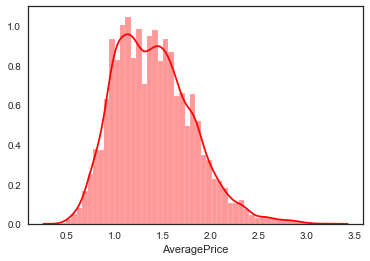

In [22]:
sns.distplot(avocado_df.AveragePrice , color="r")

- **Average Price** looks like a Normal Distribution

This fulfills the first assumption for Linear Regression : **Target Variable should be Normally Distributed**

**Visualising Pairwise correlation**

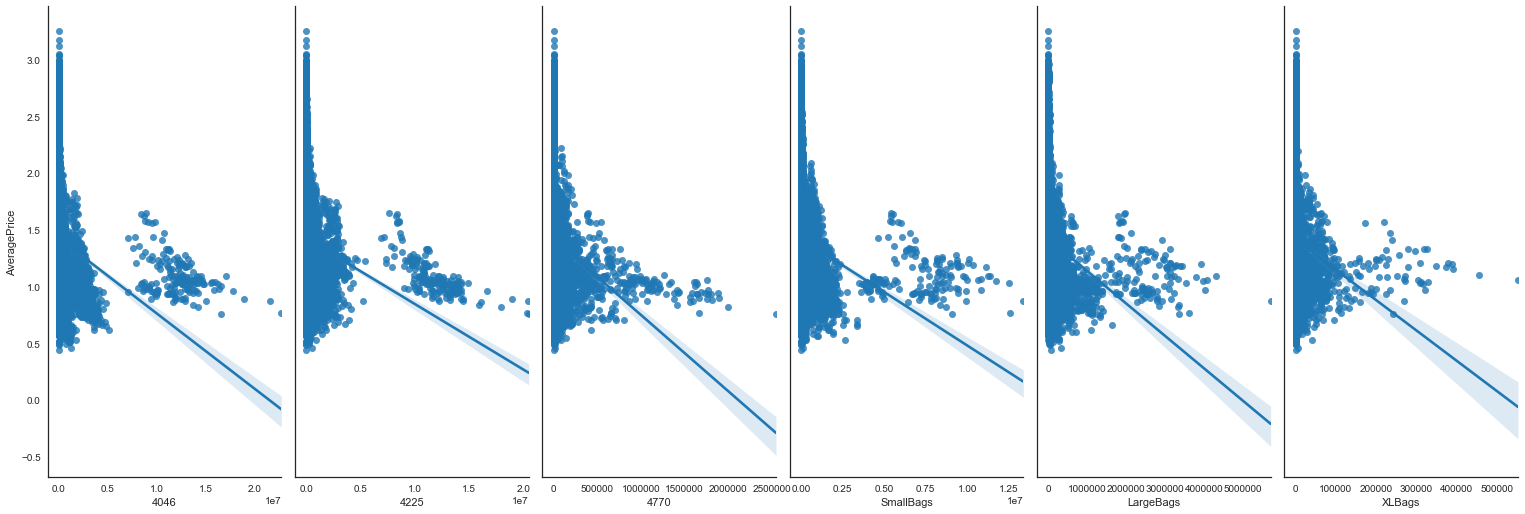

In [23]:
sns.pairplot(avocado_df, x_vars=['4046', '4225', '4770', 'SmallBags', 'LargeBags', 'XLBags' ], y_vars='AveragePrice', size=7, aspect=0.5, kind='reg')

There is a weak linear relationship between **AveragePrice** and all the other variables. 

<a id=section6></a>
### 6. Data Train-Test Split

In [24]:
X = avocado_df.loc[:, avocado_df.columns != 'AveragePrice']
y = pd.DataFrame(avocado_df.AveragePrice)

**Performing a train-test split prior to modelling**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [26]:
print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)

X_train shape :  (14599, 62)
y_train shape :  (14599, 1)


In [27]:
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)

X_test shape :  (3650, 62)
y_test shape :  (3650, 1)


**We need to ```Scale``` data, prior to modelling for standarding all the Explanatory Variables**

In [28]:
scaler = StandardScaler() # create an object

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Now  applying Linear Regression**

<a id=section7></a>
### 7. Modelling using scikit learn

We are using 3 modelling techniques to get the best results. We aim the following:
   - Low Errors in **test set (RMSE)**
   - High **R-squared** and **Adjusted R-squared** score 

<a id=section701></a>
### 7.1 Linear Regression with GridSearchCV

In [29]:
linreg = LinearRegression()
parameters = {'normalize':[True,False], 'copy_X':[True, False]}
linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
start_time = time.clock()                                                 # to measure training time

linreg.fit(X_train_scaled, y_train)                       # fit the model to the training data (learn the coefficients)
print("Total Training Time : %s seconds" %(time.clock() - start_time))
print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  

Total Training Time : 3.1384903000000577 seconds
Mean cross-validated score of the best_estimator :  0.5874603214448678


**Prediction**

In [30]:
#prediction
y_pred_train  = linreg.predict(X_train_scaled)
time_pred = time.clock()
y_pred_test = linreg.predict(X_test_scaled)                                     # make predictions on the testing set
print("Total predicting time for the test set : %s seconds" %(time.clock() - time_pred))

Total predicting time for the test set : 0.004564600000094288 seconds


**Errors**

In [31]:
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
# MAE_train = metrics.mean_absolute_error(y_train,y_pred_train)

MSE_test = metrics.mean_squared_error(y_test,y_pred_test)

RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))            # compute the RMSE of our predictions
# RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
r2 = metrics.r2_score(y_test, y_pred_test)
adjusted_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('--------------------------------------------------------------------------')
print('MAE of the model is {}'.format(MAE_test))
print('MSE of the model is {}'.format(MSE_test))
print('RMSE of the model is {}'. format(RMSE_test))
print('R squared error of the model is {}'.format(r2))
print('Adjusted R squared error of the model is {}'.format(adjusted_r_squared))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
MAE of the model is 0.19530750466344846
MSE of the model is 0.06679798230238242
RMSE of the model is 0.25845305628369425
R squared error of the model is 0.5865443969705466
Adjusted R squared error of the model is 0.5793979661403748
--------------------------------------------------------------------------


------------------------------------
<a id=section702></a>
### 7.2 Decision Tree Regression with GridSearchCV

In [32]:
dt=DecisionTreeRegressor()

In [33]:
# Number of features to consider at every split
max_features = ['auto', 'log2',2,4,8,12]
# Maximum number of levels in tree
max_depth = [2,4,8,16,25]
max_depth.append(None)
param_grid = {'max_features': max_features,
               'max_depth': max_depth,
               }

In [34]:
dt_model = GridSearchCV(estimator = dt, param_grid=param_grid, cv = 3, n_jobs = -1 ) #n_jobs=-1 to use all the cores

start_time = time.clock()
dt_model.fit(X_train_scaled,y_train)
print('Total Training Time : %s seconds'%(time.clock() - start_time))

Total Training Time : 4.168030199999976 seconds


**Predictions**

In [35]:
y_pred_train = dt_model.predict(X_train_scaled)

time_pred = time.clock()
y_pred_test = dt_model.predict(X_test_scaled)                         # make predictions on the testing set
print("Total predicting time for the test set : %s seconds" %(time.clock() - time_pred))

Total predicting time for the test set : 0.003505899999936446 seconds


**Errors**

In [36]:
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
MSE_test = metrics.mean_squared_error(y_test,y_pred_test)
r2 = metrics.r2_score(y_test, y_pred_test)
adjusted_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('--------------------------------------------------------------------------')
print('MAE of the model is {}'.format(MAE_test))
print('MSE of the model is {}'.format(MSE_test))
print('RMSE of the model is {}'. format(RMSE_test))
print('R squared error of the model is {}'.format(r2))
print('Adjusted R squared error of the model is {}'.format(adjusted_r_squared))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
MAE of the model is 0.11397935716234975
MSE of the model is 0.029347281652753267
RMSE of the model is 0.25845305628369425
R squared error of the model is 0.8183508301480305
Adjusted R squared error of the model is 0.8152110898271991
--------------------------------------------------------------------------


In [37]:
dt_model.score(X_train_scaled,y_train)

0.9671911962063958

In [38]:
dt_model.best_params_

{'max_depth': 16, 'max_features': 'auto'}

--------------------------------
<a id=section703></a>
### 7.3 Random Forest Regression with GridSearchCV

In [43]:
rf=RandomForestRegressor()

In [45]:
# Number of trees in random forest
n_estimators = [100,200,300,500]
# Number of features to consider at every split
# max_features = ['auto', 'log2','sqrt',4,8,12]
max_features = ['auto', 0.2,'log2',0.4,0.6]
# Maximum number of levels in tree
max_depth = [8,16,25]

max_depth.append(None)
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               "bootstrap": [True, False],
               "oob_score": [True]      #oob_score: Out of Bag Score; Bagging or Bootstrap Aggregation of scores
               }

In [46]:
rf_model = GridSearchCV(estimator = rf, param_grid=random_grid, cv = 3, n_jobs = -1 ) #n_jobs=-1 to use all the cores
start_time = time.clock()
rf_model.fit(X_train_scaled,y_train)
print("Total Training Time : %s seconds" %(time.clock() - start_time ))

Total Training Time : 8235.486799299999 seconds


**Prediction**

In [47]:
rf_best_model = rf_model.best_estimator_         #replacing with the best estimator
y_pred_train = rf_best_model.predict(X_train_scaled)

time_pred = time.clock()
y_pred_test = rf_best_model.predict(X_test_scaled)                         # make predictions on the testing set
print("Total predicting time for the test set : %s seconds" %(time.clock() - time_pred))

Total predicting time for the test set : 0.7419733999995515 seconds


**Errors**

In [48]:
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
MSE_test = metrics.mean_squared_error(y_test,y_pred_test)
r2 = metrics.r2_score(y_test, y_pred_test)
adjusted_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('--------------------------------------------------------------------------')
print('MAE of the model is {}'.format(MAE_test))
print('MSE of the model is {}'.format(MSE_test))
print('RMSE of the model is {}'. format(RMSE_test))
print('R squared error of the model is {}'.format(r2))
print('Adjusted R squared error of the model is {}'.format(adjusted_r_squared))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
MAE of the model is 0.07712637808219189
MSE of the model is 0.012214316849972618
RMSE of the model is 0.2560505843071123
R squared error of the model is 0.9231410044245978
Adjusted R squared error of the model is 0.9218125244341671
--------------------------------------------------------------------------


In [49]:
rf_model.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 0.6,
 'n_estimators': 500,
 'oob_score': True}

In [50]:
rf_model.score(X_train_scaled, y_train)

0.9894188955893924

In [51]:
rf_model.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

**Plotting predicted values and actual values**

In [72]:
y_test_flat = y_test.values.flatten()
y_test_flat

array([1.84, 1.14, 1.63, ..., 1.66, 1.07, 1.14])

Text(0, 0.5, 'Predicted Test Value')

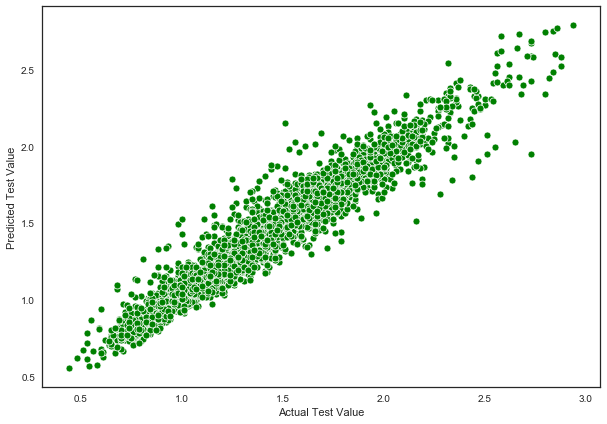

In [74]:
plt.figure(figsize=(10,7))
sns.scatterplot(x= y_test_flat, y=y_pred_test, color='g')
plt.xlabel('Actual Test Value')
plt.ylabel("Predicted Test Value")

**The Actual and Predicted Values seem to very closely agree to each other**

--------------------------------
<a id=section8></a>
### 8. Conclusion

- We predicted the Average Prices of Avocados on the basis of various features using 3 models. The RMSE and R squared values of each of them are as follows: <br>
------------------------
| **Algorithm used for the Model** | **RMSE score** |**R-squared** **score**  |
|--|--|--|
| Linear Regression | 0.27  | 0.59 |
| Decision Trees | 0.26  | 0.82 |
| Random Forest | 0.26  | 0.92 |
| | |

------------------------ 
   - While all the models have similar RMSE Scores, **Random Forest** has the greatest performance with the highest variance explained score (R-squared) of **0.92**
